In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from MCTS_v2_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra, perform_Surrogate_Prediction
from Prepare_Data_Functions import load_df, subtract_baseline, normalize_df, delete_rows

## Initialize and Load Data

Initialize the first iteration 

In [83]:
np.random.seed(2)
conc_array = np.random.dirichlet((1,1,1,1,1), 23)
conc_array_actual = conc_array

In [84]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def export_to_csv(conc_array):
    sample_volume = 300 #uL 
    conc_array = conc_array*sample_volume
    for i in range(conc_array.shape[0]):
        for j in range(conc_array.shape[1]):
            if conc_array[i,j] < 5:
                conc_array[i,j] = 0
    conc_array = np.round(conc_array)
                
    df = pd.DataFrame(conc_array, columns =['red-stock', 'green-stock', 'blue-stock', 'yellow-stock', 'water-stock'])
    df.to_csv("concentration_array.csv", index = False)

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 

Export Concentrations as CSV

In [85]:
conc_array = conc_array[:,0:-1]

In [86]:
#export_to_csv(conc_array)

Import UV-Vis Spectra from Excel 

In [87]:
df = load_df(r'Spectra_Iteration_0.xlsx')
df = subtract_baseline(df, 'C8')
df = normalize_df(df)
df = df.drop(['C8'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T


Load Desired Spectra

In [88]:
df_desired = load_df(r'Chocolate_Brown_spectra.xlsx')

In [89]:
df_desired = subtract_baseline(df_desired, 'C8')

In [90]:
df_desired = normalize_df(df_desired)

In [91]:
df_desired = df_desired.drop(['C8'], axis = 1)

In [92]:
x_test = df_desired['A1'].values.reshape(-1,1)

Additional Steps for the Zeroth Iteration

In [93]:
spectra_array = current_gen_spectra
conc_array_actual = conc_array
spectra_array_actual = spectra_array

## Analyze Fitness of Zeroth Iteration

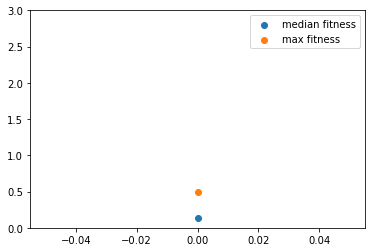

The max fitness is: 0.49004935715839615
The median fitness is: 0.12869949073592188


In [94]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list = zeroth_iteration(conc_array, spectra_array, x_test)

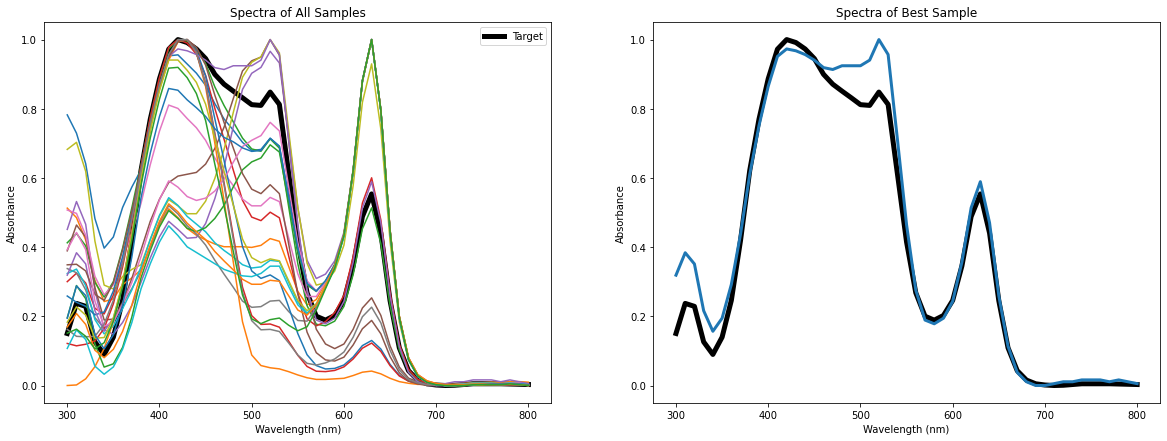

In [95]:
plot_spectra(current_gen_spectra, x_test, wavelength)

## Nth Iteration 

In [98]:
Iterations = 15
Moves_ahead = 5
GA_iterations = 5
n_samples = 23
seed = 6
mutation_rate, fitness_multiplier, mutation_rate_list_1, fitness_multiplier_list_1, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc_1 = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list)

The best move has a fitness value of 0.594988034713129
The best move occurs in 1 turns.

The surrogate model has a score of: 0.666462097690256

[[0.26926263 0.21541011 0.29328915 0.22203811]
 [0.28171642 0.36567164 0.15298507 0.19962687]
 [0.05916187 0.06409203 0.09120789 0.78553821]
 [0.49280848 0.23921272 0.03860712 0.22937169]
 [0.38641425 0.27616927 0.05011136 0.28730512]
 [0.23572296 0.14459295 0.06925881 0.55042527]
 [0.36252772 0.29490022 0.05654102 0.28603104]
 [0.31150442 0.22035398 0.15132743 0.31681416]
 [0.30833333 0.28888889 0.03333333 0.36944444]
 [0.60206561 0.08262454 0.11057108 0.20473876]
 [0.16171617 0.66666667 0.00110011 0.17051705]
 [0.07305503 0.5398482  0.14421252 0.24288425]
 [0.40421053 0.34736842 0.02315789 0.22526316]
 [0.07340067 0.48619529 0.1016835  0.33872054]
 [0.24278846 0.37860577 0.25480769 0.12379808]
 [0.25855211 0.41447892 0.00318218 0.32378679]
 [0.03352941 0.57470588 0.00529412 0.38647059]
 [0.37803468 0.26473988 0.05895954 0.2982659 ]
 [0.272954

In [99]:
best_move

array([[0.6       , 1.5       , 0.59498803]])

Run if satisfied with the best moves taken:

In [100]:
next_gen_conc = next_gen_conc_1
mutation_rate_list = mutation_rate_list_1
fitness_multiplier_list = fitness_multiplier_list_1

### Export Concentrations to CSV

In [101]:
#export_to_csv(next_gen_conc)

Create those samples using the OT2 and perfrom UV-Vis on them

### Import Spectra from excel 

In [102]:
#df = load_df(r'Spectra_iteration3_trial2.xlsx')
#df = subtract_baseline(df, 'C8')
#df = normalize_df(df)
#df = df.drop(['C8'], axis = 1)
#current_gen_spectra = np.asarray(df)
#wavelength = current_gen_spectra[:,0]
#current_gen_spectra = current_gen_spectra[:,1:].T

In [103]:
current_gen_spectra, score = perform_Surrogate_Prediction(next_gen_conc, conc_array_actual, spectra_array_actual)

In [104]:
conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))

Plots the maximum and median fitness of the spectras of the next batch of samples.

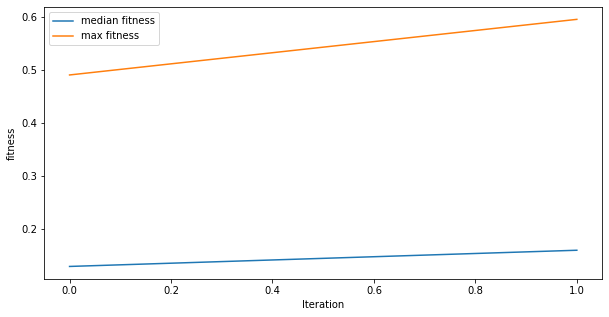

The max fitness is: 0.594988034713129
The median fitness is: 0.15927076158540335


In [105]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration)

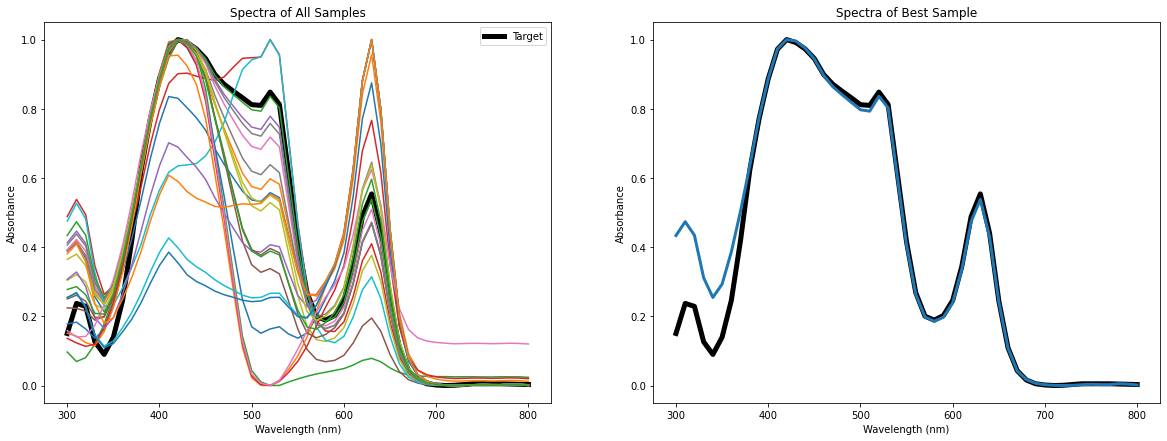

In [106]:
plot_spectra(current_gen_spectra, x_test, wavelength)

In [24]:
spectra = current_gen_spectra
desired = x_test
fitness_list = []    
for ii in range(spectra.shape[0]):
    fitness = 1/np.sum(np.abs(spectra[ii,:] - desired))
    fitness_list.append(fitness)
fitness_array = np.asarray(fitness_list).reshape(-1,1)
array = np.hstack((spectra, fitness_array))
sorted_array = array[np.argsort(array[:, -1])]

In [25]:
conc_fitness = np.hstack((next_gen_conc, fitness_array))

In [153]:
sorted_array = conc_fitness[np.argsort(conc_fitness[:, -1])]

In [154]:
sorted_array

array([[0.01113173, 0.38280767, 0.10265925, 0.12430427, 0.37909709,
        0.00073157],
       [0.00759631, 0.04177971, 0.41725448, 0.09386869, 0.43950081,
        0.00082867],
       [0.0224475 , 0.04344678, 0.41853729, 0.08110065, 0.43446778,
        0.00083961],
       [0.33031915, 0.14734043, 0.09521277, 0.06542553, 0.36170213,
        0.0008672 ],
       [0.01249219, 0.03747658, 0.1105559 , 0.44909432, 0.39038101,
        0.00090946],
       [0.01338432, 0.08604207, 0.15200765, 0.10803059, 0.64053537,
        0.00093437],
       [0.01798942, 0.03915344, 0.17142857, 0.13333333, 0.63809524,
        0.00097157],
       [0.01851852, 0.04580897, 0.16276803, 0.13937622, 0.63352827,
        0.00097918],
       [0.03812317, 0.0684262 , 0.16715543, 0.1202346 , 0.60606061,
        0.00098273],
       [0.01930894, 0.0101626 , 0.18191057, 0.15345528, 0.6351626 ,
        0.00098603],
       [0.02953157, 0.0885947 , 0.12016293, 0.13034623, 0.63136456,
        0.00098983],
       [0.01984877, 0

In [138]:
brown, score = perform_Surrogate_Prediction(np.asarray([0.19, 0.15,0.07,0.11, .21]).reshape(1,-1), conc_array_actual, spectra_array_actual)

In [139]:
wavelength.reshape(1,-1).shape

(1, 51)

In [140]:
brown.shape

(1, 51)

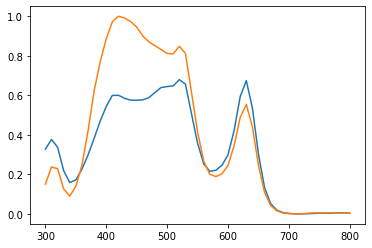

In [141]:
plt.plot(wavelength.reshape(1,-1).T, brown.T)
plt.plot(wavelength, desired)

array([[0.22783917, 0.01045053, 0.31737917, 0.22736508, 0.21696605],
       [0.17725331, 0.10121746, 0.42687623, 0.15745124, 0.13720177],
       [0.34751781, 0.2696863 , 0.0517533 , 0.25804238, 0.0730002 ],
       [0.25216797, 0.31531367, 0.11171905, 0.30719736, 0.01360195],
       [0.4489119 , 0.04307036, 0.35649761, 0.064759  , 0.08676113],
       [0.46410338, 0.13092325, 0.0578006 , 0.12716984, 0.22000294],
       [0.19452369, 0.0694945 , 0.3154453 , 0.2035095 , 0.217027  ],
       [0.1132856 , 0.36543906, 0.20088591, 0.04100884, 0.27938059],
       [0.44581966, 0.09253213, 0.29407332, 0.05579494, 0.11177995],
       [0.08620347, 0.08870756, 0.23158835, 0.11853157, 0.47496905],
       [0.20942612, 0.02283222, 0.12160827, 0.5071753 , 0.13895809],
       [0.00306479, 0.03155172, 0.00772385, 0.56581648, 0.39184316],
       [0.35700969, 0.20410006, 0.32094113, 0.0410922 , 0.07685692],
       [0.12592675, 0.07479956, 0.00792983, 0.69259384, 0.09875002],
       [0.19126956, 0.10662621, 0.